## Gamma Distribution

The distribution can be characterized by shape parameter $k$ and scale parameter $\theta$, where $k, \theta > 0$. In this case, the PDF is: $$f(x;k,\theta) = \frac{x^{k-1} e^{-\frac{x}{\theta}}}{\theta^k \Gamma(k)}$$
where $\Gamma(k)$ is the gamma function, which is a generalization of the factorial to complex numbers (defined for all except non-positive integers).

Mean: $\mathbb{E}[X] = k\theta$

Variance: $Var[X] = k\theta^2$

### Shape Parameter $k$

The Gamma distribution's skewness only depends on the shape parameter $k$. Formally, skewness is defined as $\mathbb{E}[(\frac{X - \mu}{\sigma})^3]$

In [43]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from scipy.special import gamma

def plot_gamma(params, set_ylim=True, title=None, colors=None):
    X = np.linspace(0.01, 1000, 10000)
    
    plt.figure(figsize=(8,6))
    
    if colors is not None:
        assert(len(colors) == len(params))
    
    for i, param in enumerate(params):
        k, theta = param
        num = X**(k-1) * np.exp(-(1/theta) * X)
        denom = theta**k * gamma(k)
        p = num / denom
    
        plt.plot(X, p, label=r'$k={}, \theta={}$'.format(k, theta), color=colors[i])
    
    if set_ylim:
        plt.ylim(0., 1.)
    
    if title is None:
        plt.title('Gamma Distribution')
    else:
        plt.title(title)
    plt.legend()

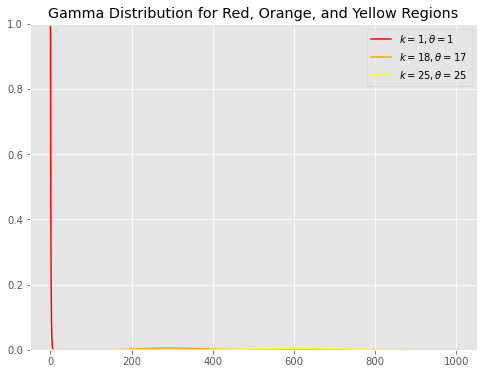

In [44]:
params = [(1,1), (18,17), (25,25)]
plot_gamma(params, title='Gamma Distribution for Red, Orange, and Yellow Regions', colors=['red', 'orange', 'yellow'])

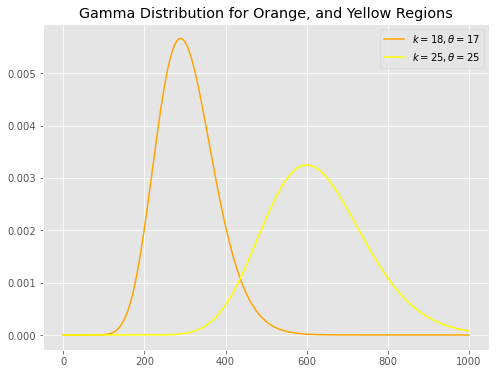

In [45]:
params = [(18,17), (25,25)]
plot_gamma(params, set_ylim=False, title='Gamma Distribution for Orange, and Yellow Regions', colors=['orange', 'yellow'])

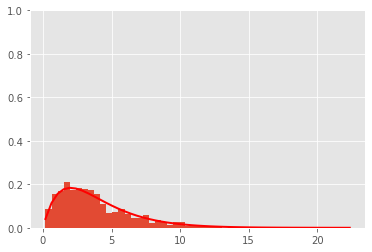

In [12]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import scipy.special as sps  

shape = 2
scale = 2
s = np.random.gamma(shape, scale, 1000)

count, bins, ignored = plt.hist(s, 50, density=True)
y = bins**(shape-1)*(np.exp(-bins/scale) /  
                    (sps.gamma(shape)*scale**shape))
plt.plot(bins, y, linewidth=2, color='r') 
plt.ylim(0., 1.)
plt.show()

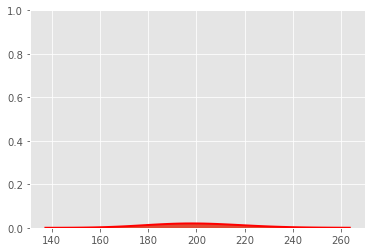

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sps  

shape = 100
scale = 2
s = np.random.gamma(shape, scale, 1000)

count, bins, ignored = plt.hist(s, 50, density=True)
y = bins**(shape-1)*(np.exp(-bins/scale) /  
                    (sps.gamma(shape)*scale**shape))
plt.plot(bins, y, linewidth=2, color='r')  
plt.ylim(0., 1.)
plt.show()

## $\log$-Normal Distribution

In [163]:
from scipy.stats import lognorm
from scipy.special import erf

def plot_lognormal(params, set_ylim=True, title=None, colors=None):
    X = np.linspace(0.000000001, 10, 1000000)
    
    plt.figure(figsize=(8,6))
    
    for param in params:
        mean, std = param
        
        dist = lognorm([std],loc=mean) # Mean, Std are for log(X)
        
        # lognorm transforms the given X to calculate the probability of log(X) ~ N(mean, std**2)
        plt.plot(X, dist.pdf(X), label=r'$\mu$={}, $\sigma^2$={}'.format(mean, std**2))
        #plt.plot(X, lognorm.pdf(X, 1, mean, var), label=r'$\mu$={}, $\sigma^2$={}'.format(mean, var))
     
    if set_ylim:
        plt.ylim(0.,10)
    plt.title('log-Normal Distribution')
    plt.legend()

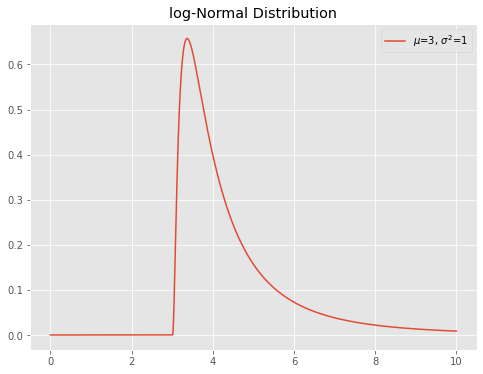

In [170]:
params = [(3,1)]
plot_lognormal(params, set_ylim=False)

In [260]:
np.random.lognormal(-3,10)

8712.68767282606

In [261]:
np.exp(-3)

0.049787068367863944